# Final Exam - Data Mining
Name: Low Tsu Siang

Matrix Number: WQD180072

New Study ID: 17051570

### Question 1
You are required  to make a user-agent that will crawl the WWW (your familiar domain)  to produce dataset of a particular website. 

- the web site can be as simple as a list of webpages and what other pages they link to

- the output does not need to be in XHTML (or HTML) form a multi-stage approach (e.g. produce the xhtml or html  in csv format  )        



In [1]:
import urllib.request
from urllib.request import urlopen
from bs4 import BeautifulSoup as soup
import pandas as pd
import re

### Background
This analysis is to examine the factors of building a winning EPL team. The Premier League, often referred to as the English Premier League or the EPL outside England, is the top level of the English football league system. Contested by 20 clubs. 

The EPL team will be divided in the 5 categories according the team points. 

##### Extract main dataframe
The main dataframe will consists of team name in EPL, team's manager & team's captain. The information is extracted from wikipedia page. All the information is stored as "df" dataframe

In [2]:
my_url= "https://en.wikipedia.org/wiki/2019%E2%80%9320_Premier_League"

In [3]:
def team(my_url):    
    page_html = urllib.request.urlopen(my_url)
    page_soup = soup(page_html, "lxml")
    # Focus on retrieving data from the main table
    right_table=page_soup.find_all('table')                           
    r_table = right_table[2].tbody
    #rows
    ##Strap every role of the tables
    rows = r_table.find_all('tr')
    #rows[1]
    ###To extract & examine the data for signal row aka country (testpoint)
    team = rows[2].find_all('td')
    # Extract the website table header name
    mcolumns = [v.text.replace('\n','') for v in rows[0].find_all('th')]
    mcolumns.remove('Shirt sponsor (sleeve)')
    mcolumns.remove('Shirt sponsor (chest)')
    ## Rename columns to shortform
    maindf=[]
    maindf = pd.DataFrame(columns = mcolumns)
    ##row 0 is the table header. Value collection start at row 1
    right_table=page_soup.find_all('table')
    r_table = right_table[2].tbody
    rows = r_table.find_all('tr')
    for i in range (1, len(rows)):
        tds = rows[i].find_all('td')
        values = [tds[0].text.replace('\n',''), tds[1].text.replace('\n',''), tds[2].text.replace('\n',''), 
                      tds[3].text.replace('\n','')]
        maindf = maindf.append(pd.Series(values, index=mcolumns),ignore_index=True)
    return maindf


In [4]:
my_url20= "https://en.wikipedia.org/wiki/2019%E2%80%9320_Premier_League"
maindf20 = team(my_url20)
my_url19='https://en.wikipedia.org/wiki/2018%E2%80%9319_Premier_League'
maindf19 = team(my_url19)


##### EPL Standings Board
EPL Standings Board can be extracted from the same wikipedia page. The aim is to extract all the information on the EPL standing baord. After the web scrawling, the information is stored in "pointdf" dataframe. The main information of this dataframe is the Points for each time. This is the labelled variable of this analysis

In [5]:
def standing(myurl):
    page_html = urllib.request.urlopen(my_url)
    page_soup = soup(page_html, "lxml")
    right_table=page_soup.find_all('table')
    r_table2 = right_table[4].tbody
    rows2 = r_table2.find_all('tr')
    pcolumns = [v.text.replace('\n','') for v in rows2[0].find_all('th')]
    pcolumns.remove('Qualification or relegation')
    pcolumns.remove('Pos')
    pcolumns = ['Team', 'Pld', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts']
    pointdf=[]
    pointdf = pd.DataFrame(columns = pcolumns)
    for i in range (1, len(rows2)):
        tds = rows2[i].find_all('td')
        pvalues = [tds[0].text.replace('\n',''), tds[1].text.replace('\n',''), tds[2].text.replace('\n',''), 
                   tds[3].text.replace('\n',''),tds[4].text.replace('\n',''),tds[5].text.replace('\n',''), 
                   tds[6].text.replace('\n',''),tds[7].text.replace('\n',''),tds[8].text.replace('\n','')]
        pointdf = pointdf.append(pd.Series(pvalues, index=pcolumns),ignore_index=True)
    return pointdf

In [6]:
my_url='https://en.wikipedia.org/wiki/2018%E2%80%9319_Premier_League'
page_html = urllib.request.urlopen(my_url)
page_soup = soup(page_html, "lxml")
right_table=page_soup.find_all('table')
r_table2 = right_table[4].tbody
rows2 = r_table2.find_all('tr')
pcolumns = [v.text.replace('\n','') for v in rows2[0].find_all('th')]
pcolumns.remove('Qualification or relegation')
pcolumns.remove('Pos')
pcolumns = ['Team', 'Pld', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts']
pointdf19=[]
pointdf19 = pd.DataFrame(columns = pcolumns)
for i in range (1, len(rows2)):
    tds = rows2[i].find_all('td')
    pvalues = [tds[0].text.replace('\n',''), tds[1].text.replace('\n',''), tds[2].text.replace('\n',''), 
                tds[3].text.replace('\n',''),tds[4].text.replace('\n',''),tds[5].text.replace('\n',''), 
                tds[6].text.replace('\n',''),tds[7].text.replace('\n',''),tds[8].text.replace('\n','')]
    pointdf19 = pointdf19.append(pd.Series(pvalues, index=pcolumns),ignore_index=True)


In [7]:
my_url22='https://en.wikipedia.org/wiki/2019%E2%80%9320_Premier_League'
page_html22 = urllib.request.urlopen(my_url22)
page_soup22 = soup(page_html22, "lxml")
right_table22=page_soup22.find_all('table')
r_table22 = right_table22[4].tbody
rows22 = r_table22.find_all('tr')
pcolumns22 = [v.text.replace('\n','') for v in rows22[0].find_all('th')]
pcolumns22.remove('Qualification or relegation')
pcolumns22.remove('Pos')
pcolumns22 = ['Team', 'Pld', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts']
pointdf20=[]
pointdf20 = pd.DataFrame(columns = pcolumns22)
for i in range (1, len(rows22)):
    tds = rows22[i].find_all('td')
    pvalues = [tds[0].text.replace('\n',''), tds[1].text.replace('\n',''), tds[2].text.replace('\n',''), 
                tds[3].text.replace('\n',''),tds[4].text.replace('\n',''),tds[5].text.replace('\n',''), 
                tds[6].text.replace('\n',''),tds[7].text.replace('\n',''),tds[8].text.replace('\n','')]
    pointdf20 = pointdf20.append(pd.Series(pvalues, index=pcolumns22),ignore_index=True)


##### Manager Data
Manager data can be extracted from wikipedia page. Each manager name in wikipedia table consists of the hyperlink of manager profile. By extracting the "href" information, I can get the url for each manager profile website. ALl the information is stored under "managerdf" dataframe


In [8]:
def manager(my_url):    
    page_html = urllib.request.urlopen(my_url)
    page_soup = soup(page_html, "lxml")
    right_table=page_soup.find_all('table')                           
    r_table = right_table[2].tbody
    rows = r_table.find_all('tr')
    team = rows[2].find_all('td')
    ## Test Point
    ## Extract the wikipedia url for each manager
    manager_url ='https://en.wikipedia.org'+team[1] .find('span',{'class':'vcard'}).a['href']
    #manager_url
    manager_html = urllib.request.urlopen(manager_url)
    manager_soup = soup(manager_html, "lxml")
    managerdf=[]
    ccolumns = ['Manager','Age']
    managerdf = pd.DataFrame(columns = ccolumns)
    for i in range (1, len(rows)):
        cteam = rows[i].find_all('td')
        manager_url ='https://en.wikipedia.org'+cteam[1] .find('span',{'class':'vcard'}).a['href']
        value1 = cteam[1].text.replace('\n','')
        value2 = managerage(manager_url)
        cvalues = [value1, value2]
        managerdf = managerdf.append(pd.Series(cvalues,index=ccolumns),ignore_index=True)
    return managerdf

In [9]:
def managerage(manager_url):
    manager_html = urllib.request.urlopen(manager_url)
    manager_soup = soup(manager_html, "lxml")
    c_table=manager_soup.find('table', {'class':'infobox vcard'}).tbody
    age = c_table.find('span',{'class':'noprint ForceAgeToShow'}).text.replace('age\xa0','') 
    return age

def managername(manager_url):
    manager_html = urllib.request.urlopen(manager_url)
    manager_soup = soup(manager_html, "lxml")
    c_table=manager_soup.find('table', {'class':'infobox vcard'}).tbody
    c_table=manager_soup.find('table', {'class':'infobox vcard'})
    name = c_table.span.text
    return name  

In [10]:
my_url20= "https://en.wikipedia.org/wiki/2019%E2%80%9320_Premier_League"
managerdf20 = manager(my_url20)
my_url19='https://en.wikipedia.org/wiki/2018%E2%80%9319_Premier_League'
managerdf19 = manager(my_url19)

In [11]:
def mdf11(all_tables4):
    ##Squad Standard Stats
    column11 = ['Team', 'Pl', 'Poss', 'Gls', 'Ast', 'PK', 'CrdY', 'CrdR']
    df11 = []
    df11 = pd.DataFrame(columns = column11)
    rows11 = all_tables4[2].find_all('tr')
    for i in range(0, len(rows11)):
        Team = rows11[i].th.text
        Pl = rows11[i].find('td',{'data-stat':'players_used'}).text
        Poss = rows11[i].find('td',{'data-stat':'possession'}).text
        Gls = rows11[i].find('td',{'data-stat':'goals'}).text
        Ast = rows11[i].find('td',{'data-stat':'assists'}).text
        PK = rows11[i].find('td',{'data-stat':'pens_made'}).text
        CrdY= rows11[i].find('td',{'data-stat':'cards_yellow'}).text
        CrdR = rows11[i].find('td',{'data-stat':'cards_red'}).text
        values11 = [Team, Pl, Poss, Gls, Ast, PK, CrdY, CrdR]
    #    print(values11)
        df11 = df11.append(pd.Series(values11,index=column11),ignore_index=True)
    return df11


In [12]:
def mdf12(all_tables4):    
    ##Squad Goalkeeping
    #all_tables[3]
    column12 = ['Team', 'GA', 'SoTA', 'Saves', 'CS']
    df12 = []
    df12 = pd.DataFrame(columns = column12)
    rows12 = all_tables4[3].find_all('tr')
    for i in range(0, len(rows12)):
        Team = rows12[i].th.text
        GA = rows12[i].find('td',{'data-stat':'goals_against_gk'}).text
        SoTA = rows12[i].find('td',{'data-stat':'shots_on_target_against'}).text
        Saves = rows12[i].find('td',{'data-stat':'saves'}).text
        CS = rows12[i].find('td',{'data-stat':'clean_sheets'}).text
        values12 = [Team, GA, SoTA, Saves, CS]
    #    print(values12)
    #    break
        df12 = df12.append(pd.Series(values12,index=column12),ignore_index=True)
    return df12

In [13]:
def mdf13(all_tables4):
    ##Squad Shooting
    ##all_tables[5]
    rows13 = all_tables4[5].find_all('tr')
    column13 = ['Team', 'PK', 'Sh', 'SoT', 'FK']
    df13 = []
    df13 = pd.DataFrame(columns = column13)
    for i in range(0, len(rows13)):
        Team = rows13[i].th.text
        PK = rows13[i].find('td',{'data-stat':'pens_made'}).text
        Sh = rows13[i].find('td',{'data-stat':'shots_total'}).text
        SoT = rows13[i].find('td',{'data-stat':'shots_on_target'}).text
        FK = rows13[i].find('td',{'data-stat':'shots_free_kicks'}).text
        values13 = [Team, PK, Sh, SoT, FK]
    #    print(values13)
    #    break
        df13 = df13.append(pd.Series(values13,index=column13),ignore_index=True)
    return df13

In [14]:
def mdf14(all_tables4):
    ##Squad Passing
    ##all_tables[6]
    rows14 = all_tables4[6].find_all('tr')
    column14 = ['Team', 'Cmp', 'Att', 'CmpPert', 'TotDist', 'PrgDist']
    df14 = []
    df14 = pd.DataFrame(columns = column14)
    for i in range(0, len(rows14)):
        Team = rows14[i].th.text
        Cmp = rows14[i].find('td',{'data-stat':'passes_completed'}).text
        Att = rows14[i].find('td',{'data-stat':'passes'}).text
        CmpPert = rows14[i].find('td',{'data-stat':'passes_pct'}).text
        TotDist = rows14[i].find('td',{'data-stat':'passes_total_distance'}).text
        PrgDist = rows14[i].find('td',{'data-stat':'passes_progressive_distance'}).text
        values14 = [Team, Cmp, Att, CmpPert, TotDist, PrgDist]
    #    print(values14)
    #    break
        df14 = df14.append(pd.Series(values14,index=column14),ignore_index=True)
    return df14


In [15]:
def mdf15(all_tables4):
    ##Squad Defensive Actions
    #all_tables[9]
    rows15 = all_tables4[9].find_all('tr')
    column15 = ['Team', 'Tkl', 'TklW', 'Press', 'PressSucc', 'Block', 'Int', 'Clr', 'Err']
    df15 = []
    df15 = pd.DataFrame(columns = column15)
    for i in range(0, len(rows15)):
        Team = rows15[i].th.text
        Tkl = rows15[i].find('td',{'data-stat':'tackles'}).text
        TklW = rows15[i].find('td',{'data-stat':'tackles_won'}).text
        Press = rows15[i].find('td',{'data-stat':'pressures'}).text
        PressSucc = rows15[i].find('td',{'data-stat':'pressure_regains'}).text
        Block = rows15[i].find('td',{'data-stat':'blocks'}).text
        Int = rows15[i].find('td',{'data-stat':'interceptions'}).text
        Clr = rows15[i].find('td',{'data-stat':'clearances'}).text
        Err = rows15[i].find('td',{'data-stat':'errors'}).text
        values15 = [Team, Tkl, TklW, Press, PressSucc, Block, Int, Clr, Err]
    #    print(values15)
    #    break
        df15 = df15.append(pd.Series(values15,index=column15),ignore_index=True)
    return df15

In [16]:
def mdf16(all_tables4):
##Squad Possession
    #all_tables[10]
    rows16 = all_tables4[10].find_all('tr')
    column16 = ['Team', 'Touches', 'SuccDri', 'TotDistCarr', 'Targ', 'Rec', 'Miscon', 'Dispos']
    df16 = []
    df16 = pd.DataFrame(columns = column16)
    for i in range(0, len(rows16)):
        Team = rows16[i].th.text
        Touches = rows16[i].find('td',{'data-stat':'touches'}).text
        SuccDri = rows16[i].find('td',{'data-stat':'dribbles_completed'}).text
        TotDistCarr = rows16[i].find('td',{'data-stat':'carry_distance'}).text
        Targ = rows16[i].find('td',{'data-stat':'pass_targets'}).text
        Rec = rows16[i].find('td',{'data-stat':'passes_received'}).text
        Miscon = rows16[i].find('td',{'data-stat':'miscontrols'}).text
        Dispos = rows16[i].find('td',{'data-stat':'dispossessed'}).text
        values16 = [Team, Touches, SuccDri, TotDistCarr, Targ, Rec, Miscon, Dispos]
    #    print(values16)
    #    break
        df16 = df16.append(pd.Series(values16,index=column16),ignore_index=True)
    return df16

In [17]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import sys, getopt
import csv
#url = 'https://fbref.com/en/comps/9/Premier-League-Stats'
def stats(url):
    res = requests.get(url)
    ## The next two lines get around the issue with comments breaking the parsing.
    comm = re.compile("<!--|-->")
    soup = BeautifulSoup(comm.sub("",res.text),'lxml')
    all_tables4 = soup.findAll("tbody")
    df11 =[]
    df12 =[]
    df13 =[]
    df14 =[]
    df15 =[]
    df16 =[]
    df11 = mdf11(all_tables4)
    df12 = mdf12(all_tables4)
    df13 = mdf13(all_tables4)
    df14 = mdf14(all_tables4)
    df15 = mdf15(all_tables4)
    df16 = mdf16(all_tables4)
    full_stat = []
    full_stat = pd.merge(df11, df12, how='left', left_on='Team', right_on='Team')
    full_stat = pd.merge(full_stat, df13, how='left', left_on='Team', right_on='Team')
    full_stat = pd.merge(full_stat, df14, how='left', left_on='Team', right_on='Team')
    full_stat = pd.merge(full_stat, df15, how='left', left_on='Team', right_on='Team')
    full_stat = pd.merge(full_stat, df16, how='left', left_on='Team', right_on='Team')
    return full_stat
    

In [18]:
my_url20= "https://fbref.com/en/comps/9/Premier-League-Stats"
full_stat20 = stats(my_url20)
my_url19='https://fbref.com/en/comps/9/1889/2018-2019-Premier-League-Stats'
full_stat19 = stats(my_url19)

### Question 5
5. You are required to write code to implement either time-series clustering or density-based clustering model using the above dataset (Question 1). If you select density-based clustering approach to achieve the task, you are going to cover the following steps:

	Importing required libraries


In [19]:
from sklearn import preprocessing
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt
import seaborn as sns

   Load the dataset (Question 1)  into a DataFrame object

In [20]:
managerdf19['Age'] = managerdf19['Age'].replace(r'[^\d\.]+', '', regex=True).apply(pd.to_numeric, errors='coerce')
managerdf20['Age'] = managerdf20['Age'].replace(r'[^\d\.]+', '', regex=True).apply(pd.to_numeric, errors='coerce')

In [21]:
def tidypointdf(pointdf):
    test = pointdf[:1] 
    test['Team'] = test['Team'].str.split(' ').str[0]
    pointdf[:1] = test
    pointdf = pointdf.rename(columns={'Team[ vte ]':'Team'})
    pointdf['Team'] = pointdf['Team'].str.split('[').str[0]
#    pointdf['Team'] = pointdf['Team'].str.split('(').str[0]
    pointC = ('Pld', 'W', 'D', 'L', 'GF', 'GA', 'Pts')
    for i in pointC:
        pointdf[i] = pointdf[i].astype(int)
    return pointdf

In [22]:
pointdf20 = tidypointdf(pointdf20)


D:\software\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
test19 = pointdf19[:1] 
test19['Team'] = test19['Team'].str.split(' ').str[0]
pointdf19[:1] = test19
pointdf19['Team'] = pointdf19['Team'].str.split('(').str[0]
pointC19 = ('Pld', 'W', 'D', 'L', 'GF', 'GA', 'Pts')
for i in pointC19:
    pointdf19[i] = pointdf19[i].astype(int)
pointdf19['Team'][0] = 'Manchester City'


D:\software\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\software\anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
decisiontdf19 = []
decisiontdf19 = maindf19
decisiontdf19 = pd.merge(decisiontdf19, managerdf19, how='left', left_on='Manager', right_on='Manager')
decisiontdf19 = pd.merge(decisiontdf19, pointdf19, how='outer')

In [25]:
decisiontdf20 = []
decisiontdf20 = maindf20
decisiontdf20 = pd.merge(decisiontdf20, managerdf20, how='left', left_on='Manager', right_on='Manager')
decisiontdf20 = pd.merge(decisiontdf20, pointdf20, how='outer')

In [26]:
full_stat20['Team'] = full_stat20['Team'].replace({'Leicester':'Leicester City', 'Brighton':'Brighton & Hove Albion', 
                                               'Norwich':'Norwich City', 'Tottenham':'Tottenham Hotspur', 
                                               'West Ham':'West Ham United', 'Manchester Utd':'Manchester United',
                                              'Newcastle Utd':'Newcastle United', 'Sheffield Utd':'Sheffield United',
                                              'Wolves':'Wolverhampton Wanderers'})
#full_stat

In [27]:
full_stat19['Team'] = full_stat19['Team'].replace({'Brighton':'Brighton & Hove Albion','Huddersfield':'Huddersfield Town',
                                                   'West Ham':'West Ham United', 'Manchester Utd':'Manchester United',
                                              'Newcastle Utd':'Newcastle United', 
                                              'Wolves':'Wolverhampton Wanderers', 'Tottenham':'Tottenham Hotspur'})

In [28]:
decisiontdf19 = pd.merge(decisiontdf19, full_stat19, how='left', left_on='Team', right_on='Team')


In [29]:
decisiontdf20 = pd.merge(decisiontdf20, full_stat20, how='left', left_on='Team', right_on='Team')


In [30]:
decisiontdf20.columns

Index(['Team', 'Manager', 'Captain', 'Kit manufacturer', 'Age', 'Pld', 'W',
       'D', 'L', 'GF', 'GA_x', 'GD', 'Pts', 'Pl', 'Poss', 'Gls', 'Ast', 'PK_x',
       'CrdY', 'CrdR', 'GA_y', 'SoTA', 'Saves', 'CS', 'PK_y', 'Sh', 'SoT',
       'FK', 'Cmp', 'Att', 'CmpPert', 'TotDist', 'PrgDist', 'Tkl', 'TklW',
       'Press', 'PressSucc', 'Block', 'Int', 'Clr', 'Err', 'Touches',
       'SuccDri', 'TotDistCarr', 'Targ', 'Rec', 'Miscon', 'Dispos'],
      dtype='object')

In [31]:
df51 = pd.concat([decisiontdf19, decisiontdf20])

In [32]:
df51.columns

Index(['Team', 'Manager', 'Captain', 'Kit manufacturer', 'Age', 'Pld', 'W',
       'D', 'L', 'GF', 'GA_x', 'GD', 'Pts', 'Pl', 'Poss', 'Gls', 'Ast', 'PK_x',
       'CrdY', 'CrdR', 'GA_y', 'SoTA', 'Saves', 'CS', 'PK_y', 'Sh', 'SoT',
       'FK', 'Cmp', 'Att', 'CmpPert', 'TotDist', 'PrgDist', 'Tkl', 'TklW',
       'Press', 'PressSucc', 'Block', 'Int', 'Clr', 'Err', 'Touches',
       'SuccDri', 'TotDistCarr', 'Targ', 'Rec', 'Miscon', 'Dispos'],
      dtype='object')

In [33]:
df52 = df51.drop(['Team', 'Manager', 'Captain', 'Pld', 'W', 'D', 'L', 'GD', 'Pts', 
                                  'Kit manufacturer'], axis = 1) 
df52 = df52.drop(['GA_x'], axis = 1)
df52 = df52.astype(float)


	Visualize the data, use only two of these attributes at the time

In [34]:
df52.columns

Index(['Age', 'GF', 'Pl', 'Poss', 'Gls', 'Ast', 'PK_x', 'CrdY', 'CrdR', 'GA_y',
       'SoTA', 'Saves', 'CS', 'PK_y', 'Sh', 'SoT', 'FK', 'Cmp', 'Att',
       'CmpPert', 'TotDist', 'PrgDist', 'Tkl', 'TklW', 'Press', 'PressSucc',
       'Block', 'Int', 'Clr', 'Err', 'Touches', 'SuccDri', 'TotDistCarr',
       'Targ', 'Rec', 'Miscon', 'Dispos'],
      dtype='object')

D:\software\anaconda\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


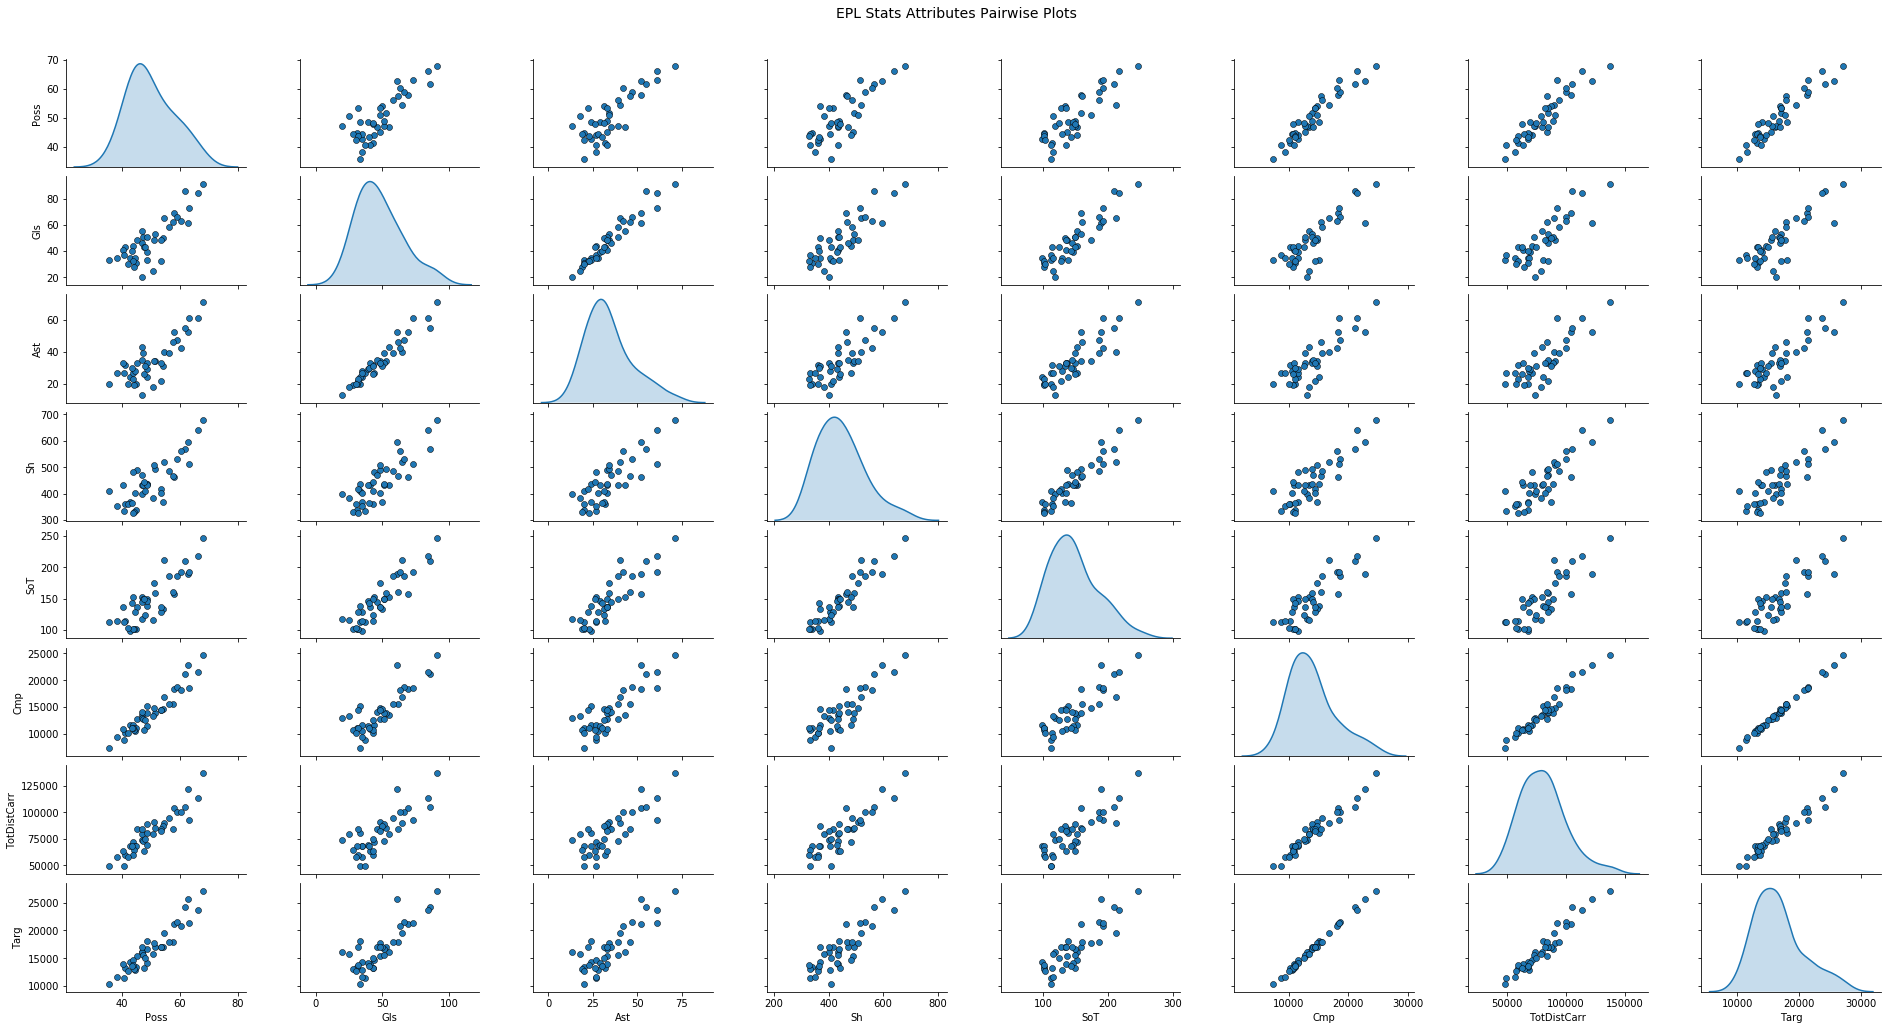

In [35]:
cols = ['Poss', 'Gls', 'Ast','Sh', 'SoT', 'Cmp', 'TotDistCarr', 'Targ']
pp = sns.pairplot(df52[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('EPL Stats Attributes Pairwise Plots', fontsize=14)

	You may need to normalise the attribute if necessary

In [41]:
# Get column names first
names = df52.columns
# Fit your data on the normalize
df52=df52.dropna()
scaled_df5 = preprocessing.normalize(df52)
scaled_df5 = pd.DataFrame(scaled_df5, columns=names)

In [42]:
print(scaled_df5)

         Age        GF        Pl      Poss       Gls       Ast      PK_x  \
0   0.000125  0.000190  0.000073  0.000151  0.000179  0.000135  0.000010   
1   0.000142  0.000189  0.000095  0.000158  0.000186  0.000145  0.000024   
2   0.000223  0.000128  0.000077  0.000156  0.000128  0.000088  0.000018   
3   0.000202  0.000186  0.000095  0.000170  0.000178  0.000132  0.000008   
4   0.000135  0.000139  0.000053  0.000139  0.000135  0.000115  0.000011   
5   0.000265  0.000188  0.000096  0.000166  0.000177  0.000121  0.000037   
6   0.000135  0.000174  0.000074  0.000166  0.000171  0.000109  0.000006   
7   0.000145  0.000158  0.000077  0.000158  0.000148  0.000105  0.000015   
8   0.000117  0.000197  0.000051  0.000136  0.000190  0.000121  0.000015   
9   0.000098  0.000190  0.000042  0.000135  0.000182  0.000142  0.000006   
10  0.000133  0.000184  0.000079  0.000155  0.000184  0.000113  0.000026   
11  0.000236  0.000166  0.000095  0.000159  0.000162  0.000130  0.000004   
12  0.000206

	Show positive correlation between attributes if necessary

In [43]:
scaled_df5.corr().round(2)

,Age,GF,Pl,Poss,Gls,Ast,PK_x,CrdY,CrdR,GA_y,...,Int,Clr,Err,Touches,SuccDri,TotDistCarr,Targ,Rec,Miscon,Dispos
Age,1.00,-0.20,0.75,0.65,-0.20,-0.20,-0.03,0.65,0.22,0.68,...,0.78,0.80,0.51,0.80,0.74,0.20,0.37,-0.48,0.75,0.81
GF,-0.20,1.00,-0.25,-0.21,0.99,0.86,0.29,-0.24,-0.09,-0.23,...,-0.23,-0.16,-0.17,-0.12,-0.25,-0.14,0.03,0.14,-0.19,-0.28
Pl,0.75,-0.25,1.00,0.81,-0.22,-0.30,-0.11,0.85,0.31,0.85,...,0.75,0.85,0.62,0.86,0.71,0.35,0.51,-0.36,0.75,0.72
Poss,0.65,-0.21,0.81,1.00,-0.19,-0.31,-0.20,0.69,0.25,0.66,...,0.58,0.80,0.58,0.77,0.72,0.26,0.49,-0.26,0.66,0.64
Gls,-0.20,0.99,-0.22,-0.19,1.00,0.86,0.29,-0.22,-0.07,-0.20,...,-0.22,-0.15,-0.17,-0.10,-0.24,-0.13,0.03,0.14,-0.17,-0.27
Ast,-0.20,0.86,-0.30,-0.31,0.86,1.00,0.12,-0.29,-0.28,-0.23,...,-0.26,-0.20,-0.21,-0.22,-0.33,-0.25,-0.13,0.04,-0.26,-0.32
PK_x,-0.03,0.29,-0.11,-0.20,0.29,0.12,1.00,-0.14,-0.22,-0.10,...,-0.06,-0.17,-0.28,-0.02,0.03,0.29,0.19,0.33,-0.15,0.01
CrdY,0.65,-0.24,0.85,0.69,-0.22,-0.29,-0.14,1.00,0.38,0.86,...,0.75,0.82,0.50,0.79,0.48,0.21,0.35,-0.51,0.74,0.67
CrdR,0.22,-0.09,0.31,0.25,-0.07,-0.28,-0.22,0.38,1.00,0.31,...,0.33,0.32,0.23,0.30,0.26,0.04,0.05,-0.28,0.42,0.26
GA_y,0.68,-0.23,0.85,0.66,-0.20,-0.23,-0.10,0.86,0.31,1.00,...,0.80,0.83,0.63,0.84,0.51,0.31,0.38,-0.50,0.84,0.72


Text(0.5, 1, 'Correlation matrix')

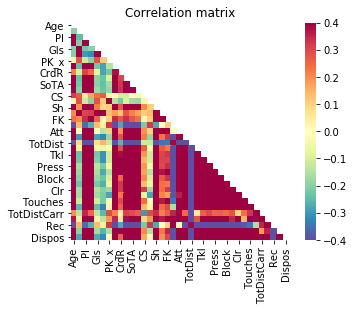

In [44]:
corrs = scaled_df5.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.4, vmax=.4)
plt.title('Correlation matrix')

	Construct a density-based clustering model and extract cluster labels and outliers to plot your results. 

In [81]:
X = scaled_df5[['Poss', 'Gls', 'Ast','Sh', 'SoT', 'Cmp', 'TotDistCarr', 'Targ']]
X = X.dropna()
# Scaling the data to bring all the attributes to a comparable level 
#scaler = StandardScaler() 
#X_scaled = scaler.fit_transform(X) 
  
# Normalizing the data so that  
# the data approximately follows a Gaussian distribution 
X_normalized = normalize(X) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 

In [82]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
print(X_principal.head()) 

         P1        P2
0 -0.000320 -0.004798
1 -0.005630 -0.000665
2  0.000686  0.004634
3  0.007773  0.010713
4  0.012129 -0.008283


In [87]:
# Numpy array of all the cluster labels assigned to each data point 
db = DBSCAN(eps = 0.005, min_samples = 3).fit(X_principal) 
labels = db.labels_ 


In [88]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 
n_clusters_

3

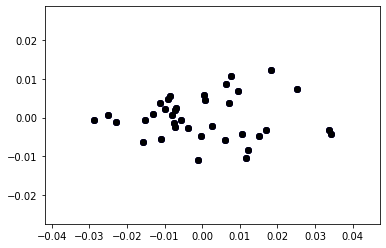

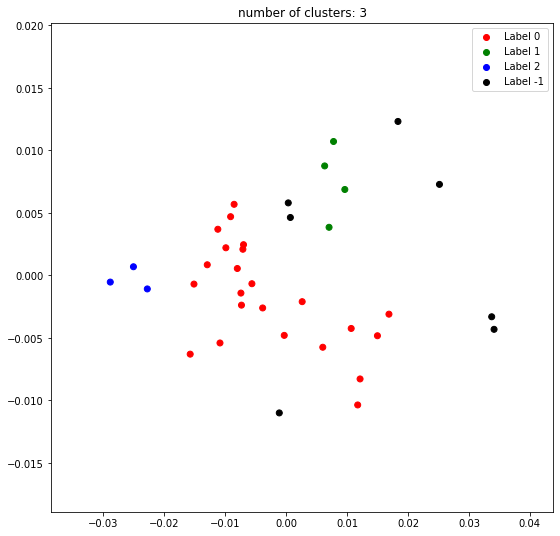

In [89]:
# Building the label to colour mapping 
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'
  
# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 
  
# For the construction of the legend of the plot 
r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r'); 
g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g'); 
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b'); 
k = plt.scatter(X_principal['P1'], X_principal['P2'], color ='k'); 
  
# Plotting P1 on the X-Axis and P2 on the Y-Axis  
# according to the colour vector defined 
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
  
# Building the legend 
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1')) 
plt.title('number of clusters: %d' %n_clusters_)   
plt.show() 

#### Conclusion:
Label 0, 1 & 2 are the clusters determined by the DBSCAN function. Noisy samples are given the label -1.
So total 3 clusters are defined in the dataset. 